<a href="https://colab.research.google.com/github/AnalyticsLover/Salifort-Motors-Turnover-Project/blob/main/Salifort_Motors_H_R_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font color='navy'><u>**Google Advance Analytics Program:** Salifort Motors H.R. Capstone Project<a class="anchor" id="Plan"></a></font></u>
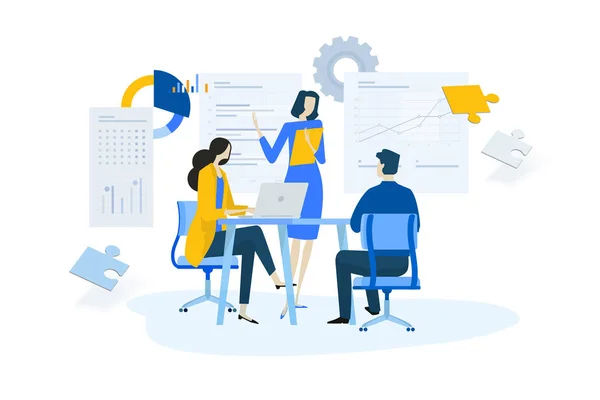
<font color='gray'><u>*Created by Lucia Pardini*<a class="anchor" id="Plan"></a></font></u>


---


#### **Project Summary**
The Salifort Motors H.R. Project serves as the capstone for the Google Advanced Analytics Program on Coursera. This project presents a business scenario that utilizes essential techniques and tools from the data analysis and data science fields. The aim is to showcase critical skills relevant to the industry.


#### **Business Scenario**
Salifort Motors is a fictional French-based alternative energy vehicle manufacturer. Its global workforce of over 100,000 employees research, design, construct, validate, and distribute electric, solar, algae, and hydrogen-based vehicles. Salifort’s end-to-end vertical integration model has made it a global leader at the intersection of alternative energy and automobiles.


Salifort’s senior leadership team is concerned about how many employees are leaving the company. Salifort strives to create a corporate culture that supports employee success and professional development. Further, the high turnover rate is costly in the financial sense. Salifort makes a big investment in recruiting, training, and upskilling its employees. To adress this issue the leadership wants the data specialists team to  analyze the survey data and come up with ideas for how to increase employee retention.



To help with this, they suggest designing a model that predicts whether an employee will leave the company based on their job title, department, number of projects, average monthly hours, and any other relevant data points. A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees.

#### **Deliverables**
- A PACE (Plan, Analyze, Construct and Execute) Stragety Document.
- An executive summary.
- Completion of an exhaustive EDA of the presented dataset.
- Building, evaluating and deployment of a statistical/ml model.
- Model results interpretation with data visualizations following ethical considerations.
- A presentation of the resources used to solve the problem.
  
#### **Data Dictionary**
Description: The dataset needed to persue this project is a csv file named "HR_comma_sep.csv" containing key information about the employees of a fictional company.

Source: [Kaggle Website](https://https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)

The creation of this dataset was intended for analysis and predictions on  employees behaviour.

The dataset 15,000 rows and 10 columns for the variables listed below.

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)




#### **1.   Plan Stage**


---





The Plan stage of the **PACE** workflow includes:

✔ Understanding of the variables

✔ Cheking data types

✔ Gathering descriptive statistics

✔ Dealing with missing values

✔ Cleaning duplicates

✔ Handling outliers

✔ Restructuring of column names

In [ ]:
# import necessary packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
import pickle



> `Pandas function read_csv()` is used to read the dataset **`HR_capstone_dataset.csv`.**



In [ ]:
# load the dataset
df0 = pd.read_csv("HR_capstone_dataset.csv")

In [ ]:
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# info and descriptive statistics of the dataset
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df0.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,int64
promotion_last_5years,int64
Department,object
salary,object


In [ ]:
# cheking for missing values
print(df0.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [ ]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# renaming columns
df0 = df0.rename(columns={"Work_accident": "work_accident", "average_montly_hours": "avg_monthly_hours", "Department": "department", "time_spend_company": "tenure"})

In [ ]:
#checking for duplicates
print(df0.duplicated().sum())

3008


In [ ]:
# handling duplicates
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
# Drop duplicates
df0 = df0.drop_duplicates(keep="first")

<Axes: xlabel='tenure'>

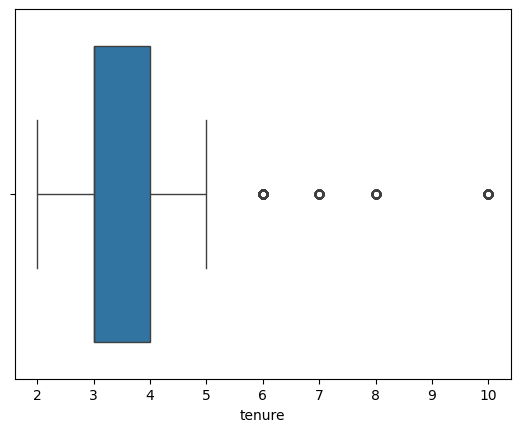

In [ ]:
# checking for outliers
sns.boxplot(x=df0["tenure"])

In [ ]:
# Determine the number of rows containing outliers
per25 = df0["tenure"].quantile(0.25)
per75 = df0["tenure"].quantile(0.75)
iqr = per75 - per25
upper = per75 + 1.5 * iqr
lower = per25 - 1.5 * iqr
outliers = df0[(df0["tenure"] > upper) | (df0["tenure"] < lower)]
print("Lower limit:", lower)
print("Upper limit:", upper)
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


In [ ]:
df1 = df0.copy()

In [ ]:
 # viewing skewness of columns
skewness = df1[['tenure', 'satisfaction_level',"last_evaluation", "number_project", 'avg_monthly_hours']].skew()
print(skewness)

tenure                1.816577
satisfaction_level   -0.538702
last_evaluation      -0.031686
number_project        0.332152
avg_monthly_hours     0.027208
dtype: float64


In [ ]:
# deal with skewness in ternure
df1["tenure"] = np.log1p(df1["tenure"])

In [ ]:
#scaling variables to handle outliers in new dataset for the modeling
scaler = StandardScaler()
df1[["satisfaction_level", "last_evaluation", "number_project", "avg_monthly_hours", "tenure"]] = scaler.fit_transform(df1[["satisfaction_level", "last_evaluation", "number_project", "avg_monthly_hours", "tenure"]])

In [ ]:
print(df1.shape)
df1.head()

(11991, 10)


,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,-1.035668,-1.108990,-1.549921,-0.892208,-0.181145,0,1,0,sales,low
1,0.706637,0.851380,1.029194,1.262709,1.902963,0,1,0,sales,medium
2,-2.155721,0.970190,2.748604,1.467939,0.649881,0,1,0,sales,medium
3,0.374770,0.910785,1.029194,0.462311,1.328879,0,1,0,sales,low
4,-1.077151,-1.168396,-1.549921,-0.851162,-0.181145,0,1,0,sales,low


In [ ]:
skewness = df1[['tenure', 'satisfaction_level',"last_evaluation", "number_project", 'avg_monthly_hours']].skew()
print(skewness)

tenure                0.760403
satisfaction_level   -0.538702
last_evaluation      -0.031686
number_project        0.332152
avg_monthly_hours     0.027208
dtype: float64


In [ ]:
# viewing relationship between variables
corr_matrix = df1.drop(["left", "salary", "department"], axis=1).corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.181994,0.039940,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.098179,-0.005695,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.203023,-0.005612,-0.000544
avg_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.108024,-0.012860,-0.004964
tenure,-0.181994,0.098179,0.203023,0.108024,1.000000,-0.008973,0.045876
work_accident,0.039940,-0.005695,-0.005612,-0.012860,-0.008973,1.000000,0.029852
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.045876,0.029852,1.000000


Text(0.5, 1.0, 'Correlation heatmap of X variables')

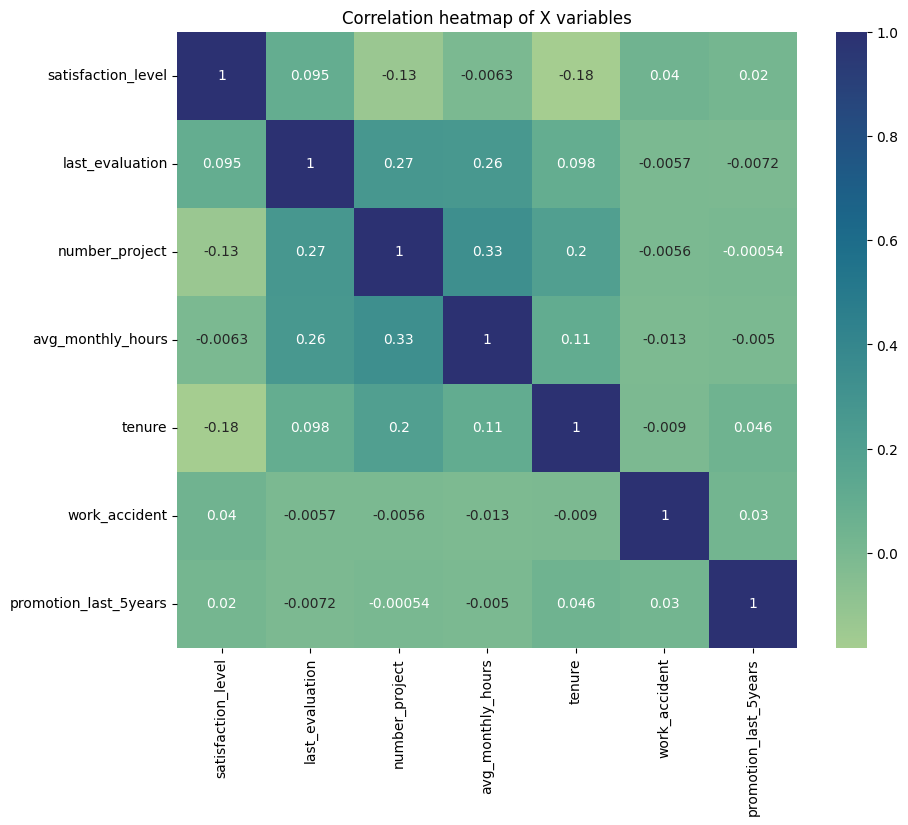

In [ ]:
#plotting the matrix w a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="crest")
plt.title("Correlation heatmap of X variables")

Text(0.5, 1.02, 'Scatter Plot Matrix of Independent Variables')

<Figure size 1200x800 with 0 Axes>

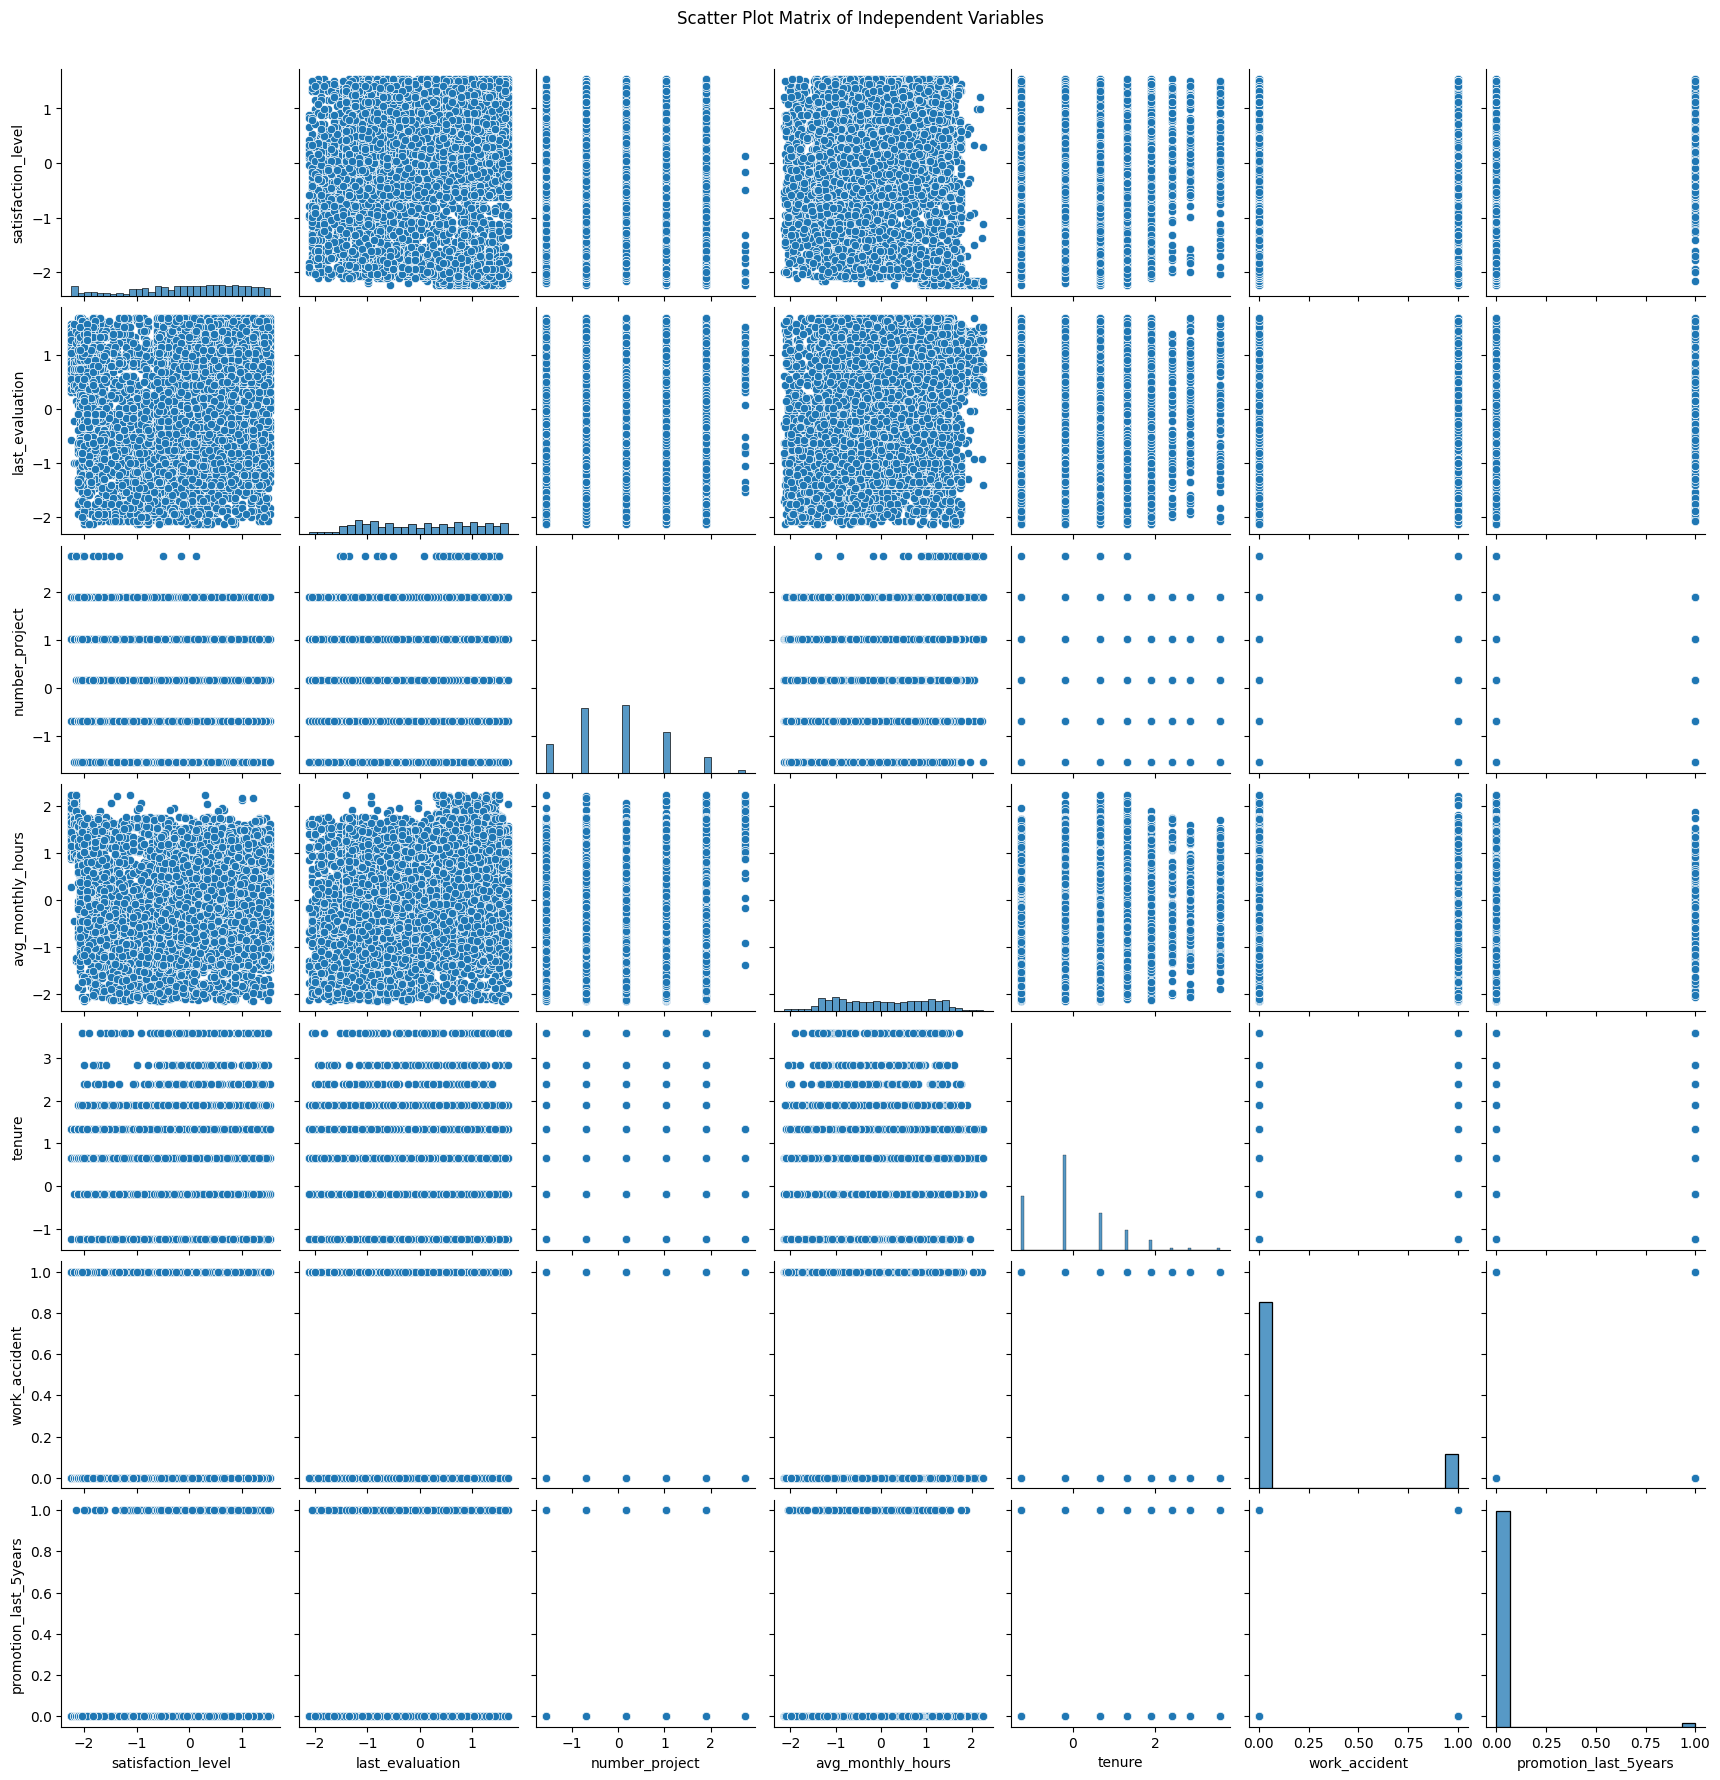

In [ ]:

columns= ['satisfaction_level', 'last_evaluation', 'number_project',
          'avg_monthly_hours', 'tenure', 'work_accident',
          'promotion_last_5years']
plt.figure(figsize=(12, 8))
sns.pairplot(df1[columns])
plt.suptitle('Scatter Plot Matrix of Independent Variables', y=1.02)



```
# Making a VIF test to secure there is no correlation between variables

The smallest value a VIF can take on is 1, which would indicate 0 correlation between the X variable in question and the other predictor variables in the model.
A high VIF, such as 5 and above, according to the can indicate the presence of multicollinearity.
```



In [ ]:

# Select nuneric variables
X = df1[['satisfaction_level', 'last_evaluation', 'number_project',
          'avg_monthly_hours', 'tenure', 'work_accident',
          'promotion_last_5years']]

# Calculate VIF for each variable
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Variable,VIF
0,satisfaction_level,1.070404
1,last_evaluation,1.144830
2,number_project,1.227015
3,avg_monthly_hours,1.169002
4,tenure,1.079964
5,work_accident,1.007629
6,promotion_last_5years,1.009247


#### **2.   Anayze Stage**


---
The Analyze stage of the **PACE** workflow includes:

✔ Searching for trends and patterns in the data

✔ Creating and visualizations

✔ Checking for modeling assumptions
 - Class imbalace
 - Multicollinearity

✔ Extracting Insights about the data


In [ ]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
df1['left'].value_counts(normalize=True)

left
0    10000
1     1991
Name: count, dtype: int64


,proportion
left,
0,0.833959
1,0.166041


In [ ]:
print(df1["satisfaction_level"].nunique())  # Check unique values in the independent variable

# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

92


<ipython-input-37-dd5e8fc071d3>:4: FutureWarning: The provided callable <function mean at 0x795bd722d5a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])
<ipython-input-37-dd5e8fc071d3>:4: FutureWarning: The provided callable <function median at 0x795bd3f24ca0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])


,mean,median
left,,
0,0.156421,0.250319
1,-0.785642,-0.911218




> Investigating "satisfaction_level" first and its relationship with "left"



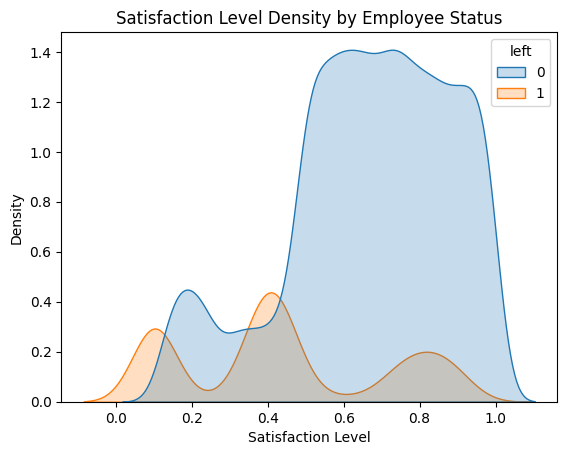

In [ ]:
sns.kdeplot(data=df0, x='satisfaction_level', hue='left', fill=True)
plt.title('Satisfaction Level Density by Employee Status')
plt.xlabel('Satisfaction Level')
plt.ylabel('Density')
plt.show()

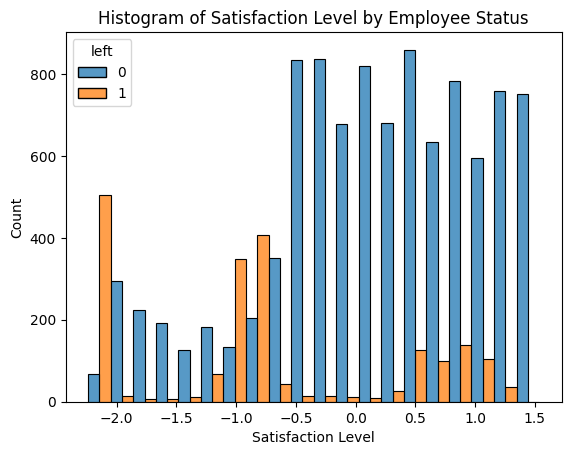

In [ ]:
sns.histplot(data=df1, x='satisfaction_level', hue='left', multiple='dodge', bins=20)
plt.title('Histogram of Satisfaction Level by Employee Status')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()



> Cheking how "satisfaction_level" engages with "salary" and "left"



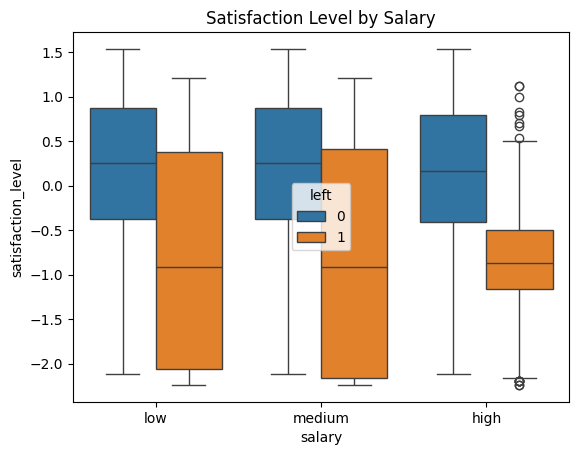

In [ ]:
sns.boxplot(data=df1, x='salary', y='satisfaction_level', hue='left')
plt.title('Satisfaction Level by Salary')
plt.show()

In [ ]:
df1.groupby(['left'])['salary'].value_counts()


left  salary
0     low       4566
      medium    4492
      high       942
1     low       1174
      medium     769
      high        48
Name: count, dtype: int64

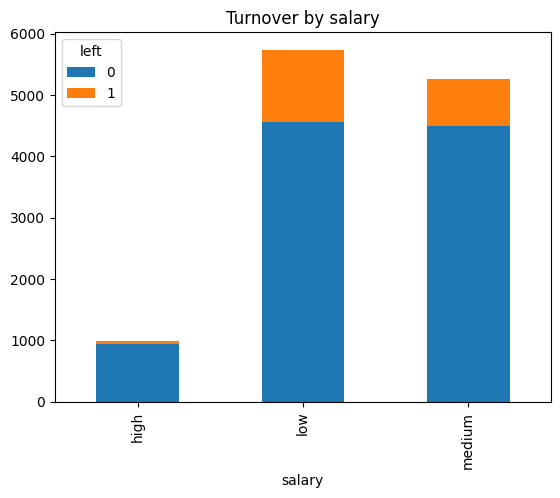

In [ ]:
# seeing turover by salary
pd.crosstab(df1["salary"], df1['left']).plot(kind='bar', stacked=True)
plt.title('Turnover by salary')
plt.show()

**58.96%** of people who left had a low salary

**38.6%** of people who left had a medium salary

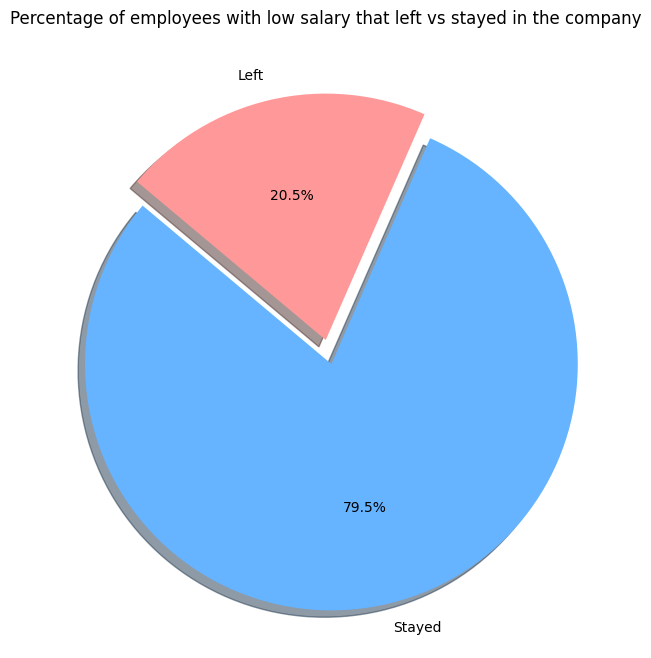

In [ ]:
# viewing salary in more depth using a pie chart
low_salary_employees = df0[df0['salary'] == 'low']

left_low_salary = low_salary_employees['left'].value_counts()


labels = ['Stayed', 'Left']
sizes = [left_low_salary.get(0, 0), left_low_salary.get(1, 0)]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of employees with low salary that left vs stayed in the company')
plt.show()

In [ ]:
df0.groupby(['salary', 'left'])['satisfaction_level'].mean().unstack()


left,0,1
salary,,
high,0.653832,0.437500
low,0.669457,0.440630
medium,0.668077,0.439896


There is not much difference in satisfation level whitin salary categories in employees who left the company.

Since satisfaction level may be a subjective variable due to the difference in standards that employees may have, this variable will not be consider as much as the rest.



> Investigating "avg_monthly_hours" against "left" and/ or other variables



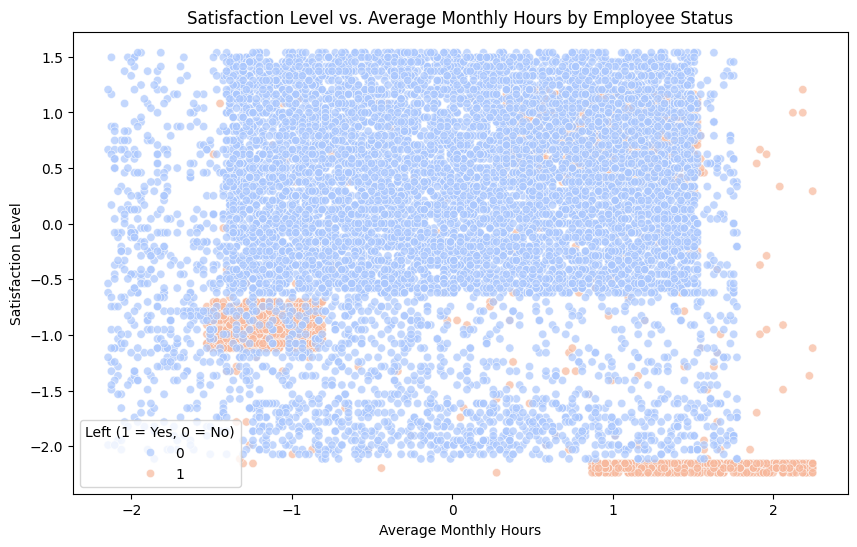

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df0, x='avg_monthly_hours', y='satisfaction_level', hue='left', palette='coolwarm', alpha=0.7)
plt.title('Satisfaction Level vs. Average Monthly Hours by Employee Status')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.legend(title='Left (1 = Yes, 0 = No)')
plt.show()

<Axes: xlabel='avg_monthly_hours', ylabel='number_project'>

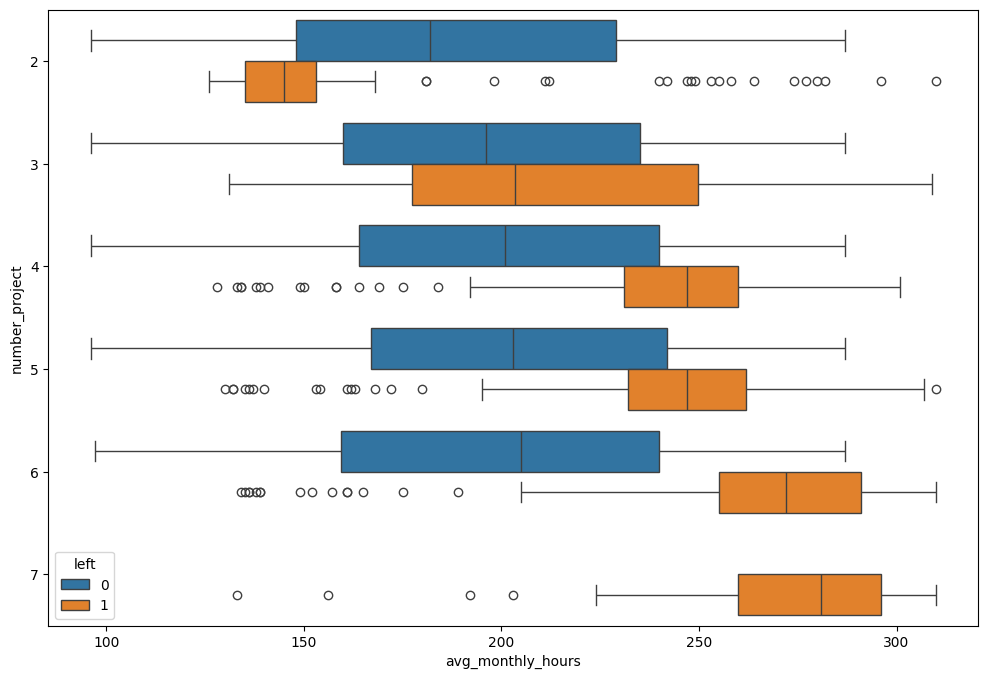

In [ ]:
# seeing "left" and its relationship with working hours and number of projects
plt.figure(figsize = (12,8))
sns.boxplot(data=df0, x='avg_monthly_hours', y='number_project', hue='left', orient="h")

In [ ]:
df0.groupby(["left"])[["avg_monthly_hours", "number_project"]].agg(["mean", "max", "min"])


avg_monthly_hours           number_project        
                  mean  max  min           mean max min
left                                                   
0            198.94270  287   96       3.786800   6   2
1            208.16223  310  126       3.883476   7   2

The data displays that employees that **worked over 208 monthly hours and in 7 project left the company**.

**No employees that worked in 7 different projects stayed in the company.**

Lets review the stats on the other variables based on those record that have "number_project" = 7.

In [ ]:
df0[df0["left"] == 1]["number_project"].value_counts().sort_values(ascending=False)


,count
number_project,
2,857
6,371
5,343
4,237
7,145
3,38


**7.28% of workers** whom **left** the company worked in **7 projects**



> Investigating tenure variable as well



In [ ]:
df0.groupby(['salary', 'tenure', 'left'])['satisfaction_level'].mean().unstack()

left                  0         1
salary tenure                    
high   2       0.689690       NaN
       3       0.682071  0.415652
       4       0.631727  0.133636
       5       0.516744  0.712143
       6       0.465217       NaN
       7       0.594211       NaN
       8       0.572222       NaN
       10      0.625000       NaN
low    2       0.700066  0.529167
       3       0.700030  0.412053
       4       0.639130  0.152095
       5       0.480108  0.715641
       6       0.490238  0.803284
       7       0.713889       NaN
       8       0.683667       NaN
       10      0.656429       NaN
medium 2       0.704114  0.542632
       3       0.696980  0.411108
       4       0.637915  0.133191
       5       0.471846  0.698000
       6       0.542237  0.790714
       7       0.625263       NaN
       8       0.671667       NaN
       10      0.675319       NaN

There is a significant drop down in satisfaction level for those employees who left the company and worked in **6 to 7 projects**.

In the other hand, there are quite a few workers who left and only worked in **2 -3 projects** that have a quite descent (not low) satisfaction level, this indicates that may be other factor/variable that affected whether the worker left the company or not.

Meanwhile, employees with low salary that left the company worked for **2 to 6 years**.

No employees with a tenure **higher than 6 years** left the company.

There is not a seemly patterns in satisfaction level regarding the tenure years in employees.

<Axes: xlabel='tenure', ylabel='Count'>

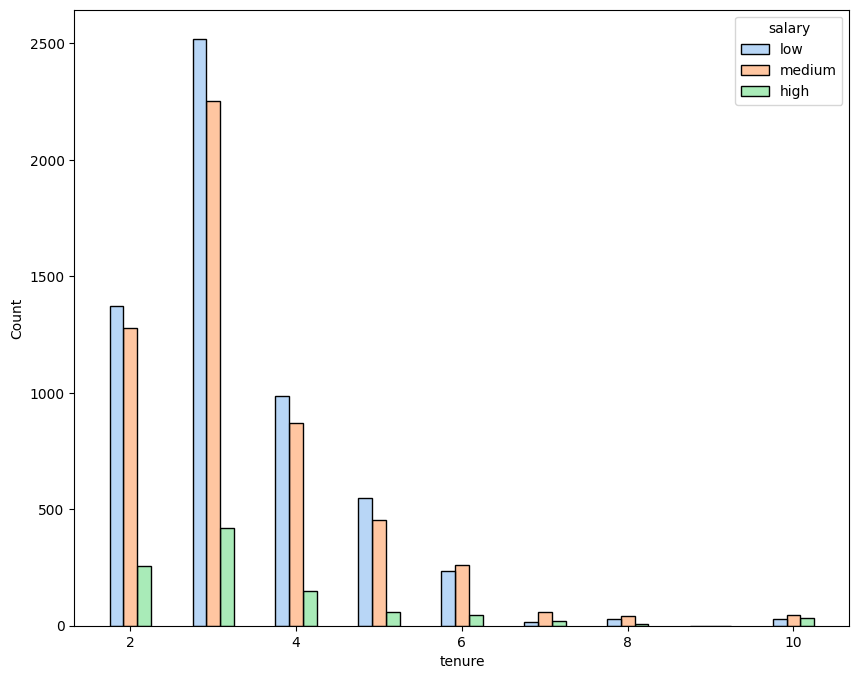

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=df0, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge',
             shrink=.5, palette='pastel')

The most predominant group in the company are employees with low salary and **3 years** working/worked for the company, conformed by **2500 workers**.

In [ ]:
df0.groupby(['left'])['last_evaluation'].mean()


,last_evaluation
left,
0,0.715667
1,0.721783


The results display that there is **no a significant difference** in last evaluation scores between employees that left/ have not left the company.

This indicates that at least in the period of time the last evaluation was made, both **employees who stayed and left** had **great performance**.



> Investigating the department variable



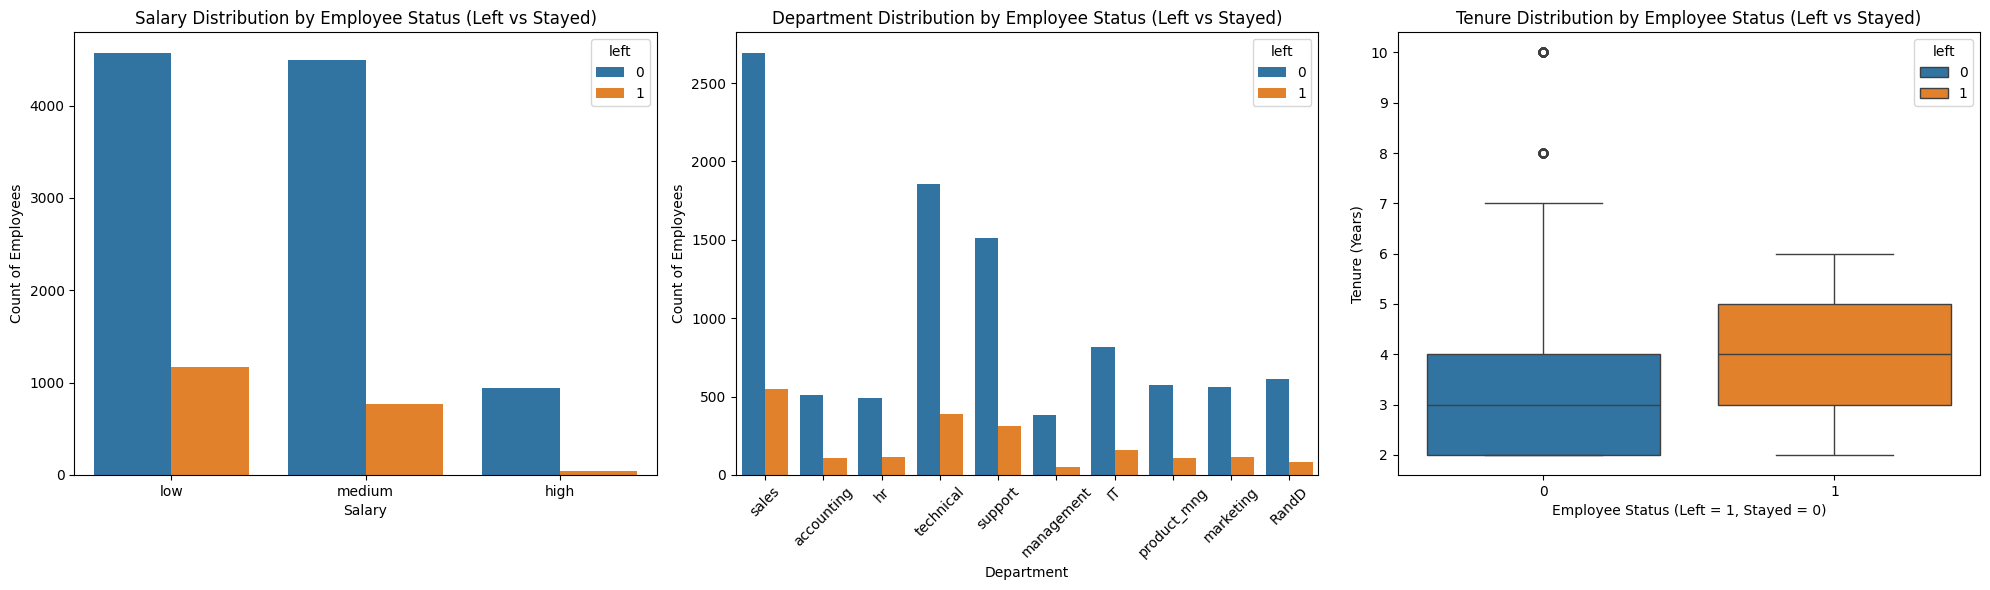

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Salary vs Employee Status
sns.countplot(data=df0, x='salary', hue='left', ax=axes[0])
axes[0].set_title('Salary Distribution by Employee Status (Left vs Stayed)')
axes[0].set_xlabel('Salary')
axes[0].set_ylabel('Count of Employees')

# Department vs Employee Status
sns.countplot(data=df0, x='department', hue='left', ax=axes[1])
axes[1].set_title('Department Distribution by Employee Status (Left vs Stayed)')
axes[1].set_xlabel('Department')
axes[1].set_ylabel('Count of Employees')
axes[1].tick_params(axis='x', rotation=45)

# Tenure vs Employee Status
sns.boxplot(data=df0, x='left', y='tenure', hue='left', dodge=False, ax=axes[2])
axes[2].set_title('Tenure Distribution by Employee Status (Left vs Stayed)')
axes[2].set_xlabel('Employee Status (Left = 1, Stayed = 0)')
axes[2].set_ylabel('Tenure (Years)')

plt.tight_layout()
plt.show()

In [ ]:
df0.groupby(['left'])['department'].value_counts()


left  department 
0     sales          2689
      technical      1854
      support        1509
      IT              818
      RandD           609
      product_mng     576
      marketing       561
      accounting      512
      hr              488
      management      384
1     sales           550
      technical       390
      support         312
      IT              158
      hr              113
      marketing       112
      product_mng     110
      accounting      109
      RandD            85
      management       52
Name: count, dtype: int64

**19.58%** of employees who left were in the **sales department**, but considering that the sales department is the one that has the most employees, this fact may be no significant to the analysis.

Text(0.5, 1.0, 'Correlation in variables')

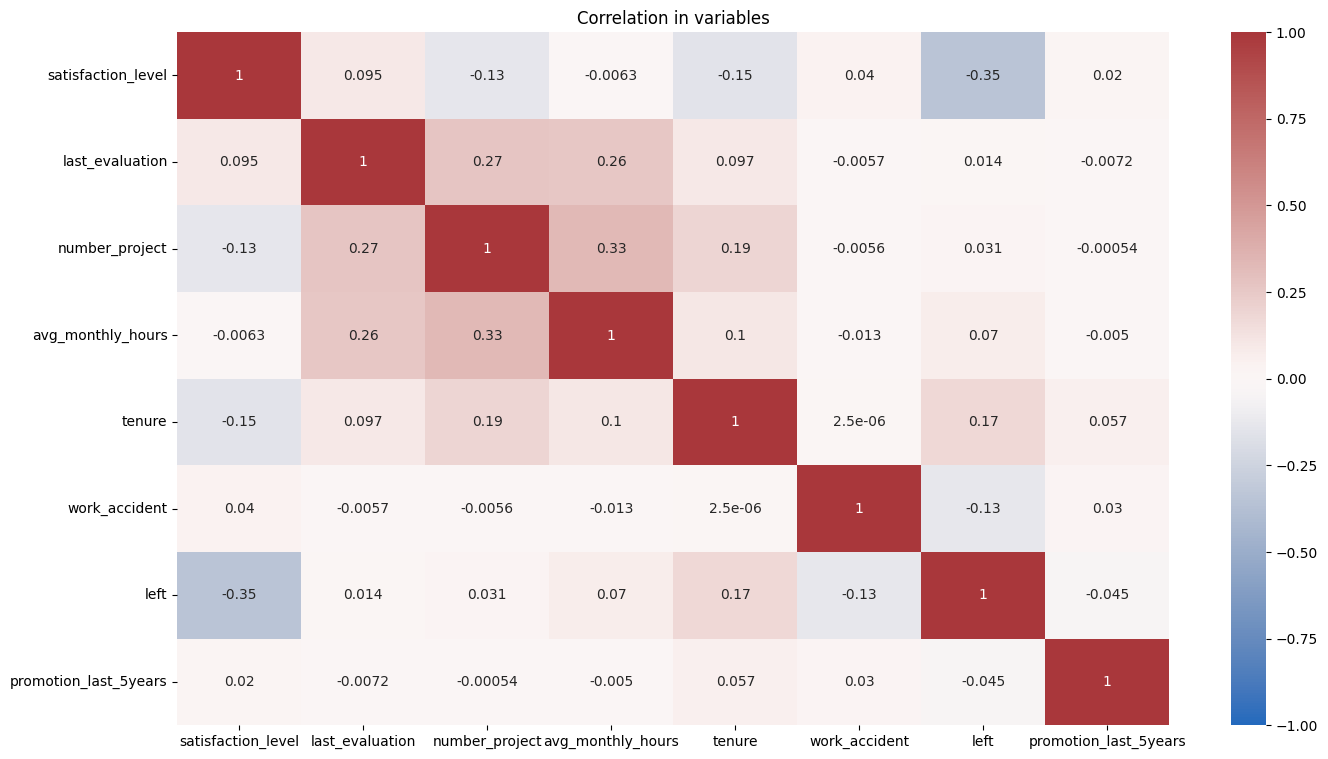

In [ ]:
plt.figure(figsize=(16, 9))
sns.heatmap(df0.drop(["department", "salary"], axis=1).corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.title("Correlation in variables")

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some **positive correlation with each other**, and whether an employee leaves is **negatively correlated** with their satisfaction level

#### **Insights**


---



💡 It appears that employees are leaving the company as a result of poor management. Employees leaving is tied to them working longer hours, having many projects, and being generally lower satisfied with the company.

💡 There's a sizeable group of employees at this company who are probably burned out since they had to work long hours and did not receive promotions or salary increases.

💡 It also appears that if an employee has spent more than six years at the company, they tend not to leave.

💡 More low pay and recent workers seem to have a weaker bound to the company, leading them to look for any other job opportunities.

#### **3. Construct Stage**


---



The Construct stage of the **PACE** workflow includes:

- Determining which models are most appropriate
- Constructing the model
- Confirming model assumptions
- Evaluating model results to determine how well the model fits the data

#### **Model Option 1: Binomial Logistic Regression**



Assumptions:
- "Y" variable is categorical ✅
- Observations are independent of eachother ✅
- There is no severe multicollinearity among X variables ✅
- There is no extreme outliers ✅

In [ ]:
# encode categorical variables department and salary
df2 = df1.copy()
df2["salary"] = (df2["salary"].astype("category").cat.set_categories(["low", "medium", "high"]).cat.codes)

df2 = pd.get_dummies(df2, drop_first=False)

In [ ]:
df2.head()


,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,-1.035668,-1.108990,-1.549921,-0.892208,-0.181145,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.706637,0.851380,1.029194,1.262709,1.902963,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,-2.155721,0.970190,2.748604,1.467939,0.649881,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.374770,0.910785,1.029194,0.462311,1.328879,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,-1.077151,-1.168396,-1.549921,-0.851162,-0.181145,0,1,0,0,False,False,False,False,False,False,False,True,False,False


<Axes: >

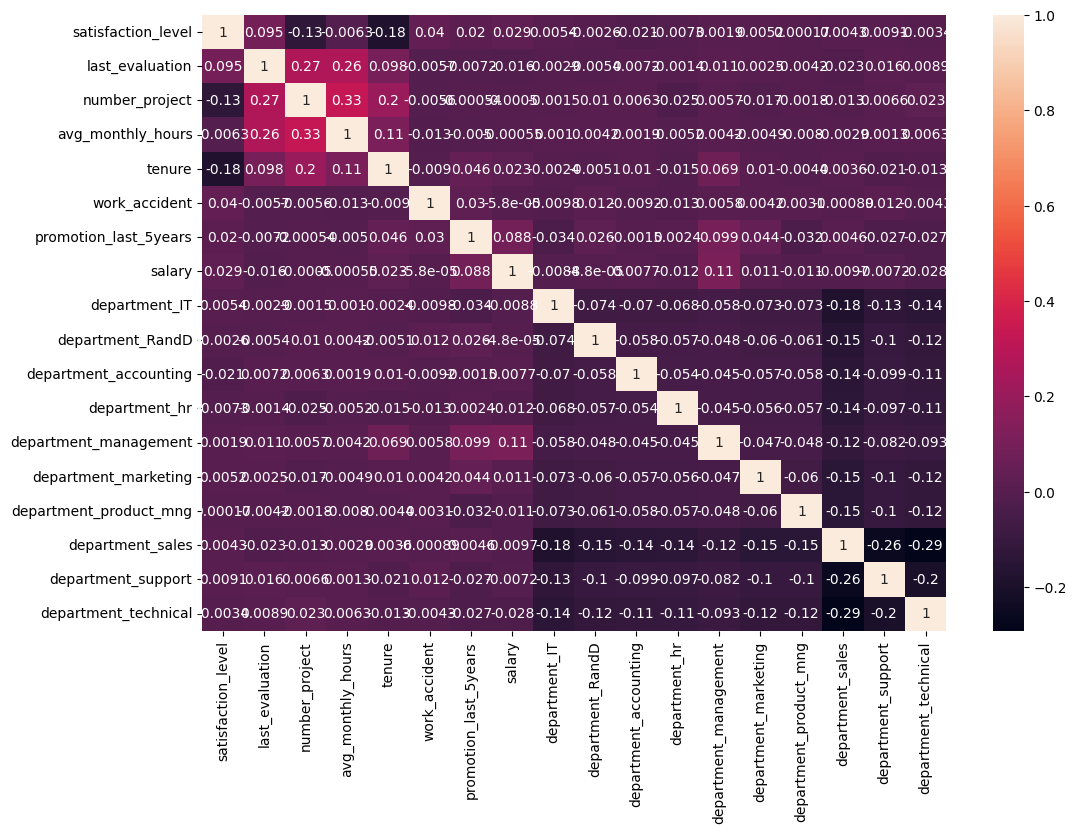

In [ ]:
corr = df2.drop("left", axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)

In [ ]:
# setting y and x varibales
y = df2["left"]
X = df2.drop("left", axis=1)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8993, 18) (2998, 18)
(8993,) (2998,)


In [ ]:
# crating a model instance
clf = LogisticRegression(random_state=42, max_iter=500, class_weight="balanced").fit(X_train, y_train)


In [ ]:
def get_scores(model, X_test, y_test):
    '''
    Generate a table of test scores for a predictive model.

    Parameters:
        model:                A fit object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Returns: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.predict(X_test)

    auc = roc_auc_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    cr = classification_report(y_test, preds)

    table = pd.DataFrame({'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
    print(cr)
    return table

In [ ]:
get_scores(clf, X_test, y_test)


              precision    recall  f1-score   support

           0       0.96      0.77      0.86      2500
           1       0.43      0.84      0.57       498

    accuracy                           0.79      2998
   macro avg       0.69      0.81      0.71      2998
weighted avg       0.87      0.79      0.81      2998



,precision,recall,f1,accuracy,AUC
0,0.426396,0.843373,0.566419,0.785524,0.808687


In [ ]:
def plot_confusion_matrix(model, X_test, y_test):
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(values_format="");

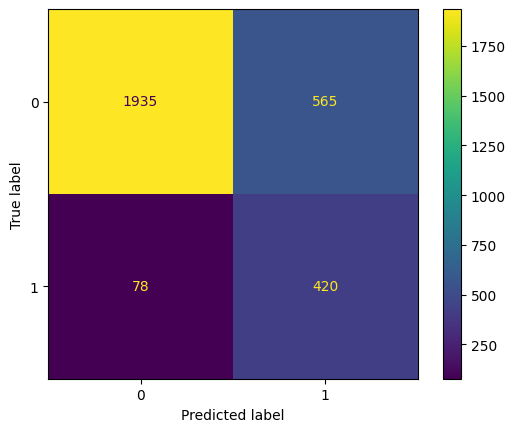

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)


The binomial logistic regression model did not perform well in predicting employees who left the company having **565 false positives**, the modeling process will continue with another type of algorithim.


#### **Model option 2: Random Forest Classifier**

- No assumptions since is a robust model ✅
- Hyper Parameter Tunning ✅
- Cross Validation ✅
- Scoring Report ✅

In [ ]:
#creting a instance of model
rfc = RandomForestClassifier(random_state=42)
# setting a parameter grid
cv_params = {'max_depth': [3,5,7],
             'max_features': [1.0],
             'min_samples_leaf': [1,2,4],
             'min_samples_split': [2,3,5],
             'n_estimators': [100, 200, 400],
             }
#setting a score metrics dictionary
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}
# using grid search to find best parameters
rfc_cv = GridSearchCV(rfc, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [ ]:
%%time

rfc_cv.fit(X_train, y_train)

CPU times: user 15min 17s, sys: 1.68 s, total: 15min 19s
Wall time: 15min 34s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7], 'max_features': [1.0],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 200, 400]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:

def write_pickle(path, model_object, save_as:str):
    '''
    In:
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)



In [ ]:
# saving the fitted model in a pickle file
path = "/content/"
write_pickle(path, rfc_cv, 'rfCV.pickle')


In [ ]:
 # READ THE PICKLE FILE
path = "/content/"
with open(path + 'rfCV.pickle.pickle', 'rb') as file:
    rfc_cv = pickle.load(file)

In [ ]:
rfc_cv.best_params_


{'max_depth': 5,
 'max_features': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [ ]:
rfc_cv.best_score_


0.9817430338264013

In [ ]:
rfc_results = get_scores(rfc_cv.best_estimator_, X_test, y_test)
rfc_results

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2500
           1       0.95      0.93      0.94       498

    accuracy                           0.98      2998
   macro avg       0.97      0.96      0.96      2998
weighted avg       0.98      0.98      0.98      2998



,precision,recall,f1,accuracy,AUC
0,0.948665,0.927711,0.938071,0.979653,0.958855


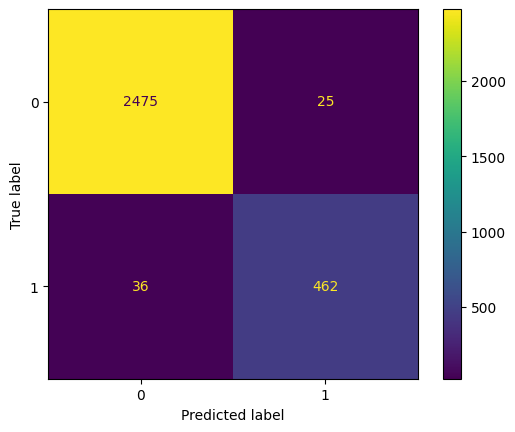

In [ ]:
plot_confusion_matrix(rfc_cv, X_test, y_test)


This model perform highly better than the last one, having the following  performing features:
- It predicted **2475 true negatives**✅
- It predicted **462 true positives**✅
- It only had **36 false negatives** and **25 false positives**.✅
- **98%** accuracy ✅
- **96%** AUC score ✅
- **95%** precision ✅
- **93%** recall ✅
- **94%** f1 score ✅

The model got more than sufficient
performing results, this settles it as the final model.

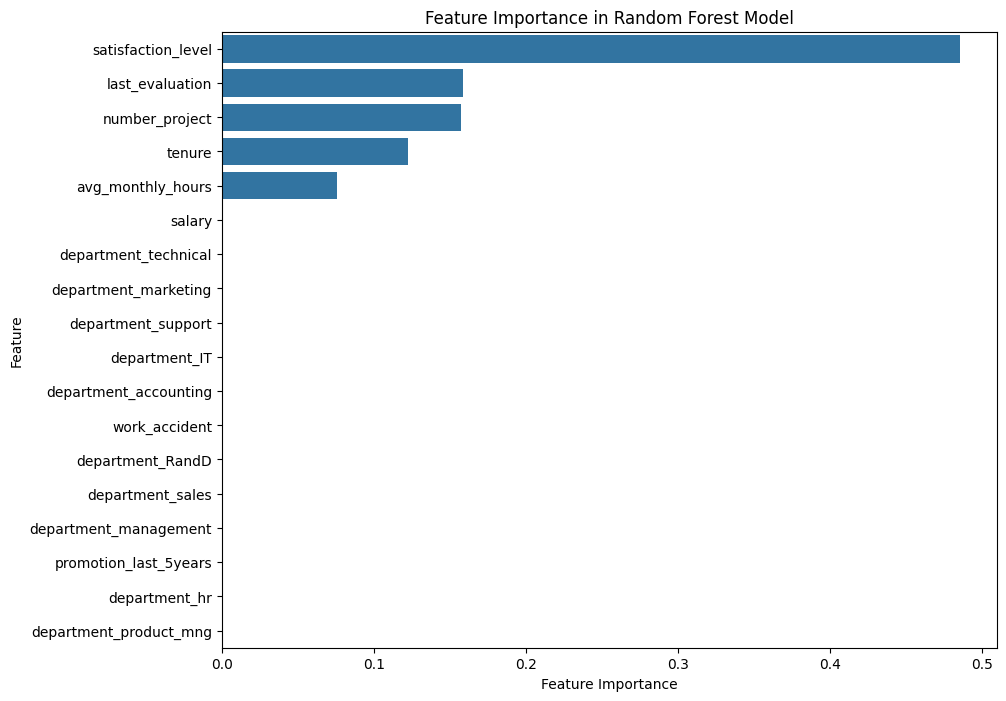

,Feature,Importance
0,satisfaction_level,0.485207
1,last_evaluation,0.158708
2,number_project,0.157045
4,tenure,0.122734
3,avg_monthly_hours,0.075666
7,salary,0.000127
17,department_technical,0.000115
13,department_marketing,0.000112
16,department_support,0.000089
8,department_IT,0.000078


In [ ]:
# seeing feature importance in model
importances = rfc_cv.best_estimator_.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], orient="h")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
#plt.gca().invert_yaxis()
plt.show()

feature_importance_df.head(10)

#### **4. Execute Stage**


---

The Execute stage of the PACE workflow includes:

✔ Interpreting the model performance and results

✔ Sharing actionable steps with stakeholders

✔ Preparing results, visualizations, and actionable steps to share with stakeholders






#### **Conclusion, Recommendations, Next Steps**


---

The insights derived from the Exploratory Data Analysis (EDA) and Data Modeling in this project indicate that employee turnover at Salifort Motors is likely influenced by factors tied to human resource practices, incentive structures, employee recognition, and workload management. Key findings highlight that long-tenured employees generally exhibit high loyalty and tend to receive higher salaries, while newer employees face lower pay and may feel less motivated. These disparities could contribute to the high turnover rate among newer employees.

💭 **Business Recommendations**

To address turnover effectively, Salifort Motors should implement strategies that foster long-term employee retention and motivation. Specifically:

- Structured Incentive Programs: Develop incentive programs targeting employees with fewer than six years at the company to increase their motivation and commitment. This could include bonuses, performance-based pay raises, or additional benefits for each year of tenure up to six years.

- Workload Management: Adjust project assignments and workload expectations for newer employees, ensuring they are not overburdened. Balancing workloads can improve job satisfaction, reduce burnout, and likely improve retention.

- Recognition Campaigns: Introduce campaigns to celebrate milestones, especially around the six-year mark, signaling to employees that their commitment is valued and rewarded. This can inspire newer employees to stay and invest in their growth within the company.

📊 **Model Improvement and Data Enhancement**

While the Random Forest model developed provides strong insights, there are several avenues for improvement:
- Advanced Modeling Techniques: Experimenting with more sophisticated models, such as XGBoost or a tuned neural network, could enhance predictive accuracy.

- Data Quality Enhancements: Gathering additional data points, such as performance evaluations from previous years, would add valuable context and could improve the model’s ability to capture performance trends.

- Add class Imbalance Handling: Addressing the class imbalance in the turnover variable (for instance, via oversampling or SMOTE) can enhance model stability and fairness, potentially leading to more reliable predictions.

💯 **Further Analysis and Ethical Considerations**

Given the model’s findings, additional analyses could focus on understanding the effects of specific incentive changes or tracking the long-term impact of workload adjustments on turnover.

In terms of ethics, it’s crucial to ensure that any predictive model does not inadvertently penalize certain employee groups or reinforce biases present in historical data. For instance, evaluating model fairness and avoiding decisions solely based on prediction outputs are essential to create equitable outcomes.

📚 **Resources Utilized**
- [Scikit-learn Documentation](https://scikit-learn.org/stable/) for model-building and evaluation guidelines.

- [Pandas Documentation](https://pandas.pydata.org/docs/) for data handling techniques.

- [XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/) for exploring potential improvements to model complexity and performance.